# 1. Random Variables

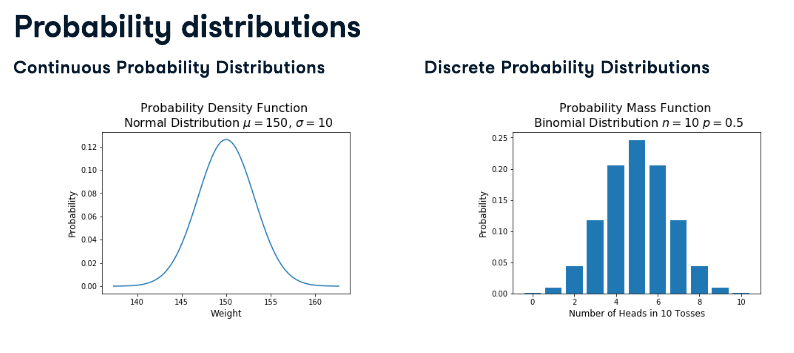

In [2]:
import numpy as np

## Random Poisson Variable

In [3]:
# Initialize seed and parameters
np.random.seed(123) 
lam, size_1, size_2 = 5, 3, 1000  

# Draw samples & calculate absolute difference between lambda and sample mean
samples_1 = np.random.poisson(lam, size_1)
samples_2 = np.random.poisson(lam, size_2)
answer_1 = abs(lam - np.mean(samples_1))
answer_2 = abs(lam - np.mean(samples_2)) 

In [4]:
print("|Lambda - sample mean| with {} samples is {} and with {} samples is {}. ".format(size_1, answer_1, size_2, answer_2))

|Lambda - sample mean| with 3 samples is 0.33333333333333304 and with 1000 samples is 0.07699999999999996. 


## Shuffle a Deck of Cards

In [6]:
deck_of_cards = [('Heart', 0),
 ('Heart', 1),
 ('Heart', 2),
 ('Heart', 3),
 ('Heart', 4),
 ('Heart', 5),
 ('Heart', 6),
 ('Heart', 7),
 ('Heart', 8),
 ('Heart', 9),
 ('Heart', 10),
 ('Heart', 11),
 ('Heart', 12),
 ('Club', 0),
 ('Club', 1),
 ('Club', 2),
 ('Club', 3),
 ('Club', 4),
 ('Club', 5),
 ('Club', 6),
 ('Club', 7),
 ('Club', 8),
 ('Club', 9),
 ('Club', 10),
 ('Club', 11),
 ('Club', 12),
 ('Spade', 0),
 ('Spade', 1),
 ('Spade', 2),
 ('Spade', 3),
 ('Spade', 4),
 ('Spade', 5),
 ('Spade', 6),
 ('Spade', 7),
 ('Spade', 8),
 ('Spade', 9),
 ('Spade', 10),
 ('Spade', 11),
 ('Spade', 12),
 ('Diamond', 0),
 ('Diamond', 1),
 ('Diamond', 2),
 ('Diamond', 3),
 ('Diamond', 4),
 ('Diamond', 5),
 ('Diamond', 6),
 ('Diamond', 7),
 ('Diamond', 8),
 ('Diamond', 9),
 ('Diamond', 10),
 ('Diamond', 11),
 ('Diamond', 12)]

In [7]:
type(deck_of_cards)

list

In [8]:
# Shuffle the deck
np.random.shuffle(deck_of_cards)

# Print out the top three cards
card_choices_after_shuffle = deck_of_cards[:3]
print(card_choices_after_shuffle)

[('Spade', 11), ('Heart', 10), ('Diamond', 1)]


# 2. Simulation Basics

## Numpy Random Simulation Syntax

In [9]:
#Generate a uniform random sample from np.arange(5) of size 3:

np.random.choice(5, 3)

array([3, 2, 2])

In [ ]:
#Generate a non-uniform random sample from np.arange(5) of size 3:

np.random.choice(5, 3, p=[0.1, 0, 0.3, 0.6, 0])

In [10]:
#Generate a uniform random sample from np.arange(5) of size 3 without replacement:

np.random.choice(5, 3, replace=False)

array([3, 2, 1])

In [12]:
#Any of the above can be repeated with an arbitrary array-like instead of just integers. For instance:

aa_milne_arr = ['pooh', 'rabbit', 'piglet', 'Christopher']
np.random.choice(aa_milne_arr, 5, p=[0.5, 0.1, 0.1, 0.3])

array(['rabbit', 'pooh', 'Christopher', 'Christopher', 'Christopher'],
      dtype='<U11')

## Dice Simulation
- Two fair dice. If same number then 1, else 0

In [13]:
# Initialize number of dice, simulate & record outcome
die, probabilities, num_dice = [1,2,3,4,5,6], [1/6, 1/6, 1/6, 1/6, 1/6, 1/6], 2
outcomes = np.random.choice(die, size=num_dice, p=probabilities) 

# Win if the two dice show the same number
if outcomes[0] == outcomes[1]: 
    answer = 'win' 
else:
    answer = 'lose'

print("The dice show {} and {}. You {}!".format(outcomes[0], outcomes[1], answer))

The dice show 5 and 5. You win!


#### Simulation 100 times and see how many times two dice having the same number

In [14]:
# Initialize model parameters & simulate dice throw
die, probabilities, num_dice = [1,2,3,4,5,6], [1/6, 1/6, 1/6, 1/6, 1/6, 1/6], 2
sims, wins = 100, 0

for i in range(sims):
    outcomes = np.random.choice(die, size=num_dice, p=probabilities) 
    # Increment `wins` by 1 if the dice show same number
    if outcomes[0] == outcomes[1]: 
        wins = wins + 1 

print("In {} games, you win {} times".format(sims, wins))

In 100 games, you win 19 times


# 3. Use Simulation for Decision Making

### Lottery Ticket Simulation
- Cost 10, 1000 ticket in total only 1 wins, grand prize is 10000
- Simulate 2000 times and calculate the expected outcome

In [18]:
# Initialize size and simulate outcome
lottery_ticket_cost, num_tickets, grand_prize = 10, 1000, 10000
chance_of_winning = 1/num_tickets
size = 2000
payoffs = [-lottery_ticket_cost,grand_prize-lottery_ticket_cost]
probs = [1-chance_of_winning,chance_of_winning]

outcomes = np.random.choice(a=payoffs, size=size, p=probs, replace=True)

# Mean of outcomes.
answer = np.mean(outcomes)
print("Average payoff from {} simulations = {}".format(size, answer))

Average payoff from 2000 simulations = -5.0


In [19]:
# We want to decide the highest price to buy the lottery ticket

# Initialize simulations and cost of ticket
sims, lottery_ticket_cost = 9000000, 0

# Use a while loop to increment `lottery_ticket_cost` till average value of outcomes falls below zero
while 1:
    outcomes = np.random.choice([-lottery_ticket_cost, grand_prize-lottery_ticket_cost],
                 size=sims, p=[1-chance_of_winning, chance_of_winning], replace=True)
    if outcomes.mean() < 0:
        break
    else:
        lottery_ticket_cost += 1
answer = lottery_ticket_cost - 1

print("The highest price at which it makes sense to buy the ticket is {}".format(answer))

The highest price at which it makes sense to buy the ticket is 9
